# Develop A Neural Network That Can Read Handwriting
<img src="hwdc.jpeg" width="800px" height="200px">

### Importing important libraries

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import IPython
from six.moves import urllib

In [5]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

11493376/11490434 [==============================] - 0s 0us/step


### Preprocessing Data

In [6]:
def preprocess_images(imgs): 
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape
    return imgs / 255.0

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

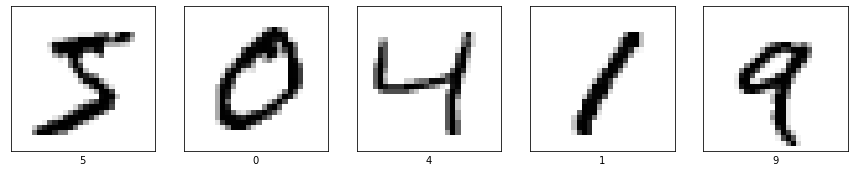

In [7]:
plt.figure(figsize=(15,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

### Building Model using CNN

In [8]:
model = keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
# one more dropout
model.add(Dropout(0.5))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training model

In [10]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 589s 10ms/sample - loss: 0.2041 - acc: 0.9377
Epoch 2/5
60000/60000 [==============================] - 581s 10ms/sample - loss: 0.0853 - acc: 0.9753
Epoch 3/5
60000/60000 [==============================] - 576s 10ms/sample - loss: 0.0640 - acc: 0.9808
Epoch 4/5
60000/60000 [==============================] - 575s 10ms/sample - loss: 0.0547 - acc: 0.9829
Epoch 5/5
60000/60000 [==============================] - 582s 10ms/sample - loss: 0.0446 - acc: 0.9862


### Evaluating the model

In [11]:
print(test_images.shape)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

(10000, 28, 28, 1)
10000/10000 [==============================] - 30s 3ms/sample - loss: 0.0344 - acc: 0.9894
Test accuracy: 0.9894


#### Hence the accuracy of the model is 98.94%